In [ ]:
from google.colab import drive
drive.mount('/content/drive')

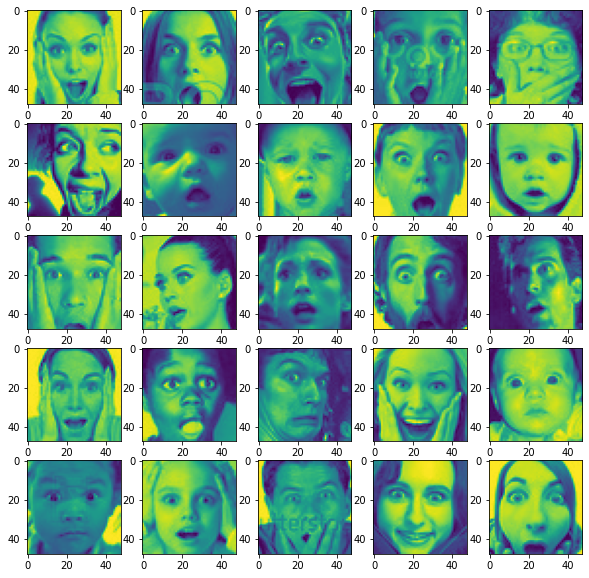

In [ ]:
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))

carpeta = '/content/drive/MyDrive/GestionProyectos/FER2013/emotion_faces/surprise'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' +nombreimg)
  plt.imshow(imagen)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale=1. /255,
    rotation_range = 30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5,1.5],
    validation_split=0.2
)

data_gen_entrenamiento = datagen.flow_from_directory(
    '/content/drive/MyDrive/GestionProyectos/archive5/emotion_faces/dataset', 
    target_size=(48,48),
    batch_size=32,
    color_mode='grayscale',
    shuffle=True, 
    subset='training'
    )

data_gen_pruebas = datagen.flow_from_directory(
    '/content/drive/MyDrive/GestionProyectos/archive5/emotion_faces/dataset',
    target_size=(48,48), 
    batch_size=32, 
    color_mode='grayscale',
    shuffle=True, 
    subset='validation'
    )

Found 5600 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(255, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(data_gen_entrenamiento, epochs=150, batch_size=64, validation_data=data_gen_pruebas)

Epoch 1/100
175/175 [==============================] - 2981s 17s/step - loss: 1.9381 - accuracy: 0.1625 - val_loss: 1.9238 - val_accuracy: 0.1914
Epoch 2/100
175/175 [==============================] - 31s 177ms/step - loss: 1.9231 - accuracy: 0.1782 - val_loss: 1.9231 - val_accuracy: 0.1957
Epoch 3/100
175/175 [==============================] - 30s 173ms/step - loss: 1.9134 - accuracy: 0.1945 - val_loss: 1.8985 - val_accuracy: 0.2207
Epoch 4/100
175/175 [==============================] - 30s 171ms/step - loss: 1.9036 - accuracy: 0.1970 - val_loss: 1.8743 - val_accuracy: 0.2493
Epoch 5/100
175/175 [==============================] - 30s 171ms/step - loss: 1.8911 - accuracy: 0.2071 - val_loss: 1.8726 - val_accuracy: 0.2371
Epoch 6/100
175/175 [==============================] - 30s 174ms/step - loss: 1.8709 - accuracy: 0.2343 - val_loss: 1.8366 - val_accuracy: 0.2614
Epoch 7/100
175/175 [==============================] - 31s 174ms/step - loss: 1.8653 - accuracy: 0.2309 - val_loss: 1.8263 -

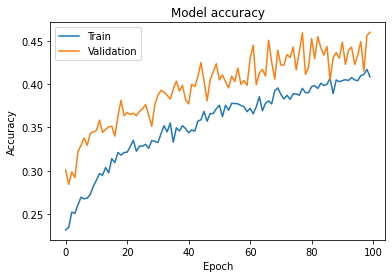

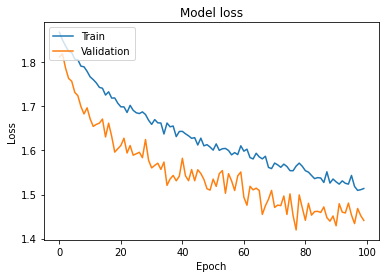

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()